In [1]:
%cd /home/ducpham/Documents/LightRAG
# move to project

/home/ducpham/Documents/LightRAG


In [ ]:
# init global config for classes 

from config import ConfigParams
from dataclasses import asdict

config = asdict(ConfigParams())
for k, v in config.items():
    print(f"Key: {k}  -> Value: {v}")

### 1. NetworKX Demo

In [3]:
from lightrag.graphstore import NetworkXStorage
import networkx as nx

#### 1.1 Init Network

In [4]:
chunk_entity_relation_graph = NetworkXStorage(
    namespace="Test_LightRAG",
    global_config=config
)

#### 1.2 upsert some data

In [5]:
entity_data = [
    {
        "node_id": "Eren",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Eren Yeager là nhân vật chính, có khả năng biến thành Titan",
            "entity_source_id": "1"
        }
    },
    {
        "node_id": "Mikasa",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Mikasa là bạn của Eren và Armin, cậu được nhận nuôi bời gia đình của Eren",
            "entity_source_id": "2"
        }
    },
    {
        "node_id": "Armin",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Armin là một chiến lược gia tài năng, bạn thân của Eren và Mikasa",
            "entity_id": "3"
        }
    },
    {
        "node_id": "Levi",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Levi là đội trưởng của Đội Trinh Sát, được mệnh danh là người lính mạnh nhất của nhân loại",
            "entity_source_id": "4"
        }
    },
    {
        "node_id": "Hange",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Hange Zoe là một nhà khoa học thiên tài, đội trưởng của Đội Điều tra, có niềm đam mê mãnh liệt với Titan.",
            "entity_source_id": "5"
        }
    },
    {
        "node_id": "Erwin",
        "node_data": {
            "entity_type": "person",
            "entity_desc": """Erwin Smith là chỉ huy đời thứ 13 của Quân đoàn Trinh sát, một người lãnh đạo tài ba, thông minh và có tầm nhìn xa trông rộng. 
                            Ông là người đã dẫn dắt Quân đoàn Trinh sát đạt được nhiều thành công trong cuộc chiến chống lại Titan.""",
            "entity_source_id": "6"
        }
    },
    {
        "node_id": "Bertholdt",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Bertholdt Hoover là một trong những người lính tinh nhuệ của Marley, đồng thời cũng là người thừa kế Titan Khổng Lồ. Anh ta có tính cách nhút nhát, hiền lành và thường xuyên bị Reiner và Annie tác động.",
            "entity_source_id": "16"
        }
    },
    {
        "node_id": "Reiner",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Reiner Braun là một trong những người lính tinh nhuệ của Marley, đồng thời cũng là người thừa kế Titan Thiết Giáp. Anh ta luôn cảm thấy tội lỗi vì những hành động của mình.",
            "entity_source_id": "11"
        }
    },
    {
        "node_id": "Annie",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Annie Leonhart là một trong những người lính tinh nhuệ của Marley, đồng thời cũng là người thừa kế Titan Nữ. Cô có tính cách lạnh lùng, ít nói và luôn đặt nhiệm vụ lên hàng đầu.",
            "entity_source_id": "12"
        }
    },
    {
        "node_id": "Jean",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Jean Kirschtein là một thành viên của Đội Trinh sát, ban đầu có ước mơ trở thành một sĩ quan. Anh ta có tính cách tự cao, kiêu ngạo nhưng lại rất trung thành với bạn bè. Jean luôn cố gắng thể hiện bản thân và chứng tỏ khả năng của mình.",
            "entity_source_id": "20"
        }
    },
    {
        "node_id": "Connie",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Connie Springer là một thành viên của Đội Trinh sát, có tính cách vui vẻ, hoạt bát và thường xuyên trêu chọc bạn bè. Dù có vẻ ngoài hài hước nhưng Connie rất dũng cảm và sẵn sàng hy sinh vì bạn bè.",
            "entity_source_id": "21"
        }
    },
    {
        "node_id": "Sasha",
        "node_data": {
            "entity_type": "person",
            "entity_desc": "Sasha Braus là một thành viên của Đội Trinh sát, nổi tiếng với tình yêu dành cho đồ ăn. Cô có xuất thân từ một ngôi làng nhỏ và luôn mang theo bên mình một con dao để săn bắn. Sasha là một người bạn tốt, luôn quan tâm và chia sẻ với mọi người.",
            "entity_source_id": "22"
        }
    }
]

In [6]:
relation_data = [
    {
        "src_node_id": "Eren",
        "tgt_node_id": "Mikasa",
        "edge_data": {
            "edge_desc": "Eren là bạn thân thiết của Mikasa từ nhỏ",
            "edge_keyword": "friend",
            "edge_weight": "10",
            "edge_source_id": "1"
        }
    },
    {
        "src_node_id": "Eren",
        "tgt_node_id": "Armin",
        "edge_data": {
            "edge_desc": "Eren và Armin là bạn thân từ thời thơ ấu",
            "edge_keyword": "friend",
            "edge_weight": "9",
            "edge_source_id": "2"
        }
    },
    {
        "src_node_id": "Mikasa",
        "tgt_node_id": "Armin",
        "edge_data": {
            "edge_desc": "Mikasa và Armin là bạn thân, cùng chiến đấu trong Đội Trinh Sát",
            "edge_keyword": "friend",
            "edge_weight": "8",
            "edge_source_id": "3"
        }
    },
    {
        "src_node_id": "Levi",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Levi là chỉ huy trực tiếp và người hướng dẫn của Eren",
            "edge_keyword": "commander",
            "edge_weight": "7",
            "edge_source_id": "4"
        }
    },
    {
        "src_node_id": "Levi",
        "tgt_node_id": "Hange",
        "edge_data": {
            "edge_desc": "Levi và Hange là đồng đội lâu năm, cùng làm việc trong Đội Trinh Sát",
            "edge_keyword": "colleague",
            "edge_weight": "9",
            "edge_source_id": "5"
        }
    },
    {
        "src_node_id": "Hange",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Hange rất quan tâm đến khả năng của Eren và thường xuyên nghiên cứu về Titan",
            "edge_keyword": "researcher",
            "edge_weight": "8",
            "edge_source_id": "6"
        }
    },
    {
        "src_node_id": "Erwin",
        "tgt_node_id": "Levi",
        "edge_data": {
            "edge_desc": "Erwin và Levi là đồng đội lâu năm, cùng nhau trải qua nhiều khó khăn và chiến đấu chống lại Titan.",
            "edge_keyword": "colleague",
            "edge_weight": "9",
            "edge_source_id": "7"
        }
    },
    {
        "src_node_id": "Erwin",
        "tgt_node_id": "Hange",
        "edge_data": {
            "edge_desc": "Erwin rất tin tưởng vào tài năng của Hange và thường giao cho cô những nhiệm vụ quan trọng.",
            "edge_keyword": "commander",
            "edge_weight": "8",
            "edge_source_id": "8"
        }
    },
    {
        "src_node_id": "Erwin",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Erwin nhìn thấy tiềm năng lớn ở Eren và tin rằng cậu sẽ trở thành một người lãnh đạo vĩ đại.",
            "edge_keyword": "mentor",
            "edge_weight": "7",
            "edge_source_id": "9"
        }
    },
    {
        "src_node_id": "Reiner",
        "tgt_node_id": "Annie",
        "edge_data": {
            "edge_desc": "Reiner và Annie là đồng đội thân thiết từ nhỏ, cùng nhau thực hiện nhiệm vụ xâm nhập đảo Paradis.",
            "edge_keyword": "friend",
            "edge_weight": "9",
            "entity_source_id": "14"
        }
    },
    {
        "src_node_id": "Reiner",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Reiner và Eren đã từng là bạn bè, nhưng sau đó trở thành kẻ thù khi Reiner tiết lộ thân phận thật của mình.",
            "edge_keyword": "enemy",
            "edge_weight": "7",
            "entity_source_id": "15"
        }
    },
    {
        "src_node_id": "Reiner",
        "tgt_node_id": "Bertholdt",
        "edge_data": {
            "edge_desc": "Reiner và Bertholdt là bạn thân từ nhỏ, cùng nhau thực hiện nhiệm vụ xâm nhập đảo Paradis.",
            "edge_keyword": "friend",
            "edge_weight": "9",
            "entity_source_id": "17"
        }
    },
    {
        "src_node_id": "Annie",
        "tgt_node_id": "Bertholdt",
        "edge_data": {
            "edge_desc": "Annie và Bertholdt là đồng đội, cùng nhau thực hiện nhiệm vụ xâm nhập đảo Paradis. Annie thường tỏ ra lạnh lùng với Bertholdt.",
            "edge_keyword": "colleague",
            "edge_weight": "8",
            "entity_source_id": "18"
        }
    },
    {
        "src_node_id": "Jean",
        "tgt_node_id": "Connie",
        "edge_data": {
            "edge_desc": "Jean và Connie là bạn thân từ thuở nhỏ, cùng nhau trải qua quá trình huấn luyện và chiến đấu. Mặc dù thường xuyên cãi nhau nhưng họ luôn có mặt để giúp đỡ nhau.",
            "edge_keyword": "best_friend",
            "edge_weight": "9",
            "entity_source_id": "23"
        }
    },
    {
        "src_node_id": "Jean",
        "tgt_node_id": "Sasha",
        "edge_data": {
            "edge_desc": "Jean và Sasha thường xuyên trêu chọc nhau, nhưng họ cũng rất quan tâm đến nhau. Sasha thường nấu ăn cho Jean và các thành viên khác trong đội.",
            "edge_keyword": "friend",
            "edge_weight": "8",
            "entity_source_id": "24"
        }
    },
    {
        "src_node_id": "Connie",
        "tgt_node_id": "Sasha",
        "edge_data": {
            "edge_desc": "Connie và Sasha là bạn thân, cùng nhau chia sẻ sở thích ăn uống và thường xuyên đi săn cùng nhau.",
            "edge_keyword": "best_friend",
            "edge_weight": "9",
            "entity_source_id": "25"
        }
    },
    {
        "src_node_id": "Jean",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Jean và Eren thường xuyên đối đầu nhưng dần trở thành đồng đội tin cậy",
            "edge_keyword": "comrade",
            "edge_weight": "6",
            "edge_source_id": "5"
        }
    },
    {
        "src_node_id": "Jean",
        "tgt_node_id": "Mikasa",
        "edge_data": {
            "edge_desc": "Jean có cảm tình đặc biệt với Mikasa từ khi còn là học viên",
            "edge_keyword": "admirer",
            "edge_weight": "7",
            "edge_source_id": "6"
        }
    },
    {
        "src_node_id": "Connie",
        "tgt_node_id": "Eren",
        "edge_data": {
            "edge_desc": "Connie là bạn đồng khóa với Eren trong Đội Trinh Sát",
            "edge_keyword": "friend",
            "edge_weight": "5",
            "edge_source_id": "7"
        }
    },
    {
        "src_node_id": "Connie",
        "tgt_node_id": "Armin",
        "edge_data": {
            "edge_desc": "Connie và Armin là bạn thân trong Đội Trinh Sát, thường hợp tác trong các nhiệm vụ",
            "edge_keyword": "friend",
            "edge_weight": "6",
            "edge_source_id": "8"
        }
    },
    {
        "src_node_id": "Sasha",
        "tgt_node_id": "Mikasa",
        "edge_data": {
            "edge_desc": "Sasha và Mikasa là bạn thân nữ trong Đội Trinh Sát",
            "edge_keyword": "friend",
            "edge_weight": "7",
            "edge_source_id": "9"
        }
    },
    {
        "src_node_id": "Sasha",
        "tgt_node_id": "Connie",
        "edge_data": {
            "edge_desc": "Sasha và Connie là cặp bạn thân, thường tạo ra những tình huống hài hước",
            "edge_keyword": "best_friend",
            "edge_weight": "9",
            "edge_source_id": "10"
        }
    },
    {
        "src_node_id": "Sasha",
        "tgt_node_id": "Armin",
        "edge_data": {
            "edge_desc": "Sasha và Armin là đồng đội thân thiết trong Đội Trinh Sát",
            "edge_keyword": "friend",
            "edge_weight": "6",
            "edge_source_id": "11"
        }
    }
]

In [7]:
import json

with open("./testing/data/entity.json", mode='w') as f:
    json.dump(entity_data, f, indent=4, ensure_ascii=True)    

with open("./testing/data/relation.json", mode='w') as f:
    json.dump(relation_data, f, indent=4, ensure_ascii=True)

In [8]:
for data in entity_data:
    await chunk_entity_relation_graph.upsert_node(
        node_id=data["node_id"],
        node_data=data["node_data"]
    )

In [9]:
for data in relation_data:
    await chunk_entity_relation_graph.upsert_edge(
        src_node_id=data["src_node_id"],
        tgt_node_id=data["tgt_node_id"],
        edge_data=data['edge_data']
    )

In [10]:
chunk_entity_relation_graph.write_nx_graph(file_name="./testing/data/aot.graphml", G=chunk_entity_relation_graph._graph)

INFO:lightrag:Writing graph with 12 nodes, 22 edges


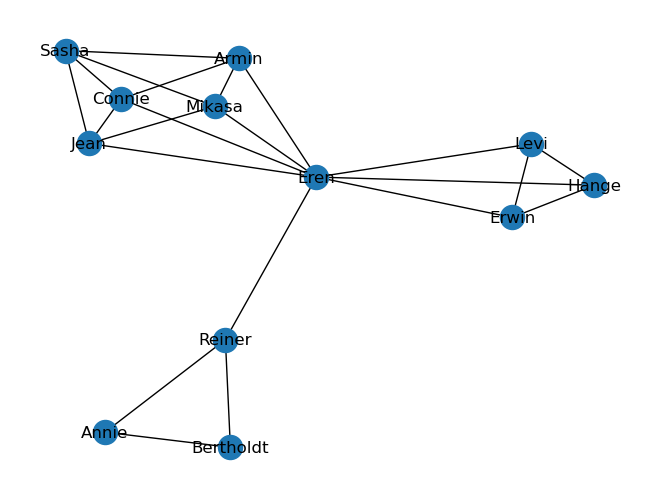

In [11]:
nx.draw(G=chunk_entity_relation_graph.load_nx_graph(file_name="./testing/data/aot.graphml"),
        with_labels = True)

#### 1.3 Get data

In [15]:
await chunk_entity_relation_graph.get_node(node_id="Eren")

{'entity_type': 'person',
 'entity_desc': 'Eren Yeager là nhân vật chính, có khả năng biến thành Titan',
 'entity_source_id': '1'}

In [17]:
await chunk_entity_relation_graph.get_all_nodes()

NodeView(('Eren', 'Mikasa', 'Armin', 'Levi', 'Hange', 'Erwin', 'Bertholdt', 'Reiner', 'Annie', 'Jean', 'Connie', 'Sasha'))

In [18]:
await chunk_entity_relation_graph.get_edge(src_node_id="Eren", tgt_node_id="Mikasa")

/home/ducpham/Documents/LightRAG/lightrag/graphstore/networkx.py:65: RuntimeWarning: coroutine 'NetworkXStorage.has_edge' was never awaited
  if self.has_edge(src_node_id, tgt_node_id):


{'edge_desc': 'Eren là bạn thân thiết của Mikasa từ nhỏ',
 'edge_keyword': 'friend',
 'edge_weight': '10',
 'edge_source_id': '1'}

In [19]:
await chunk_entity_relation_graph.get_all_edges()

EdgeView([('Eren', 'Mikasa'), ('Eren', 'Armin'), ('Eren', 'Levi'), ('Eren', 'Hange'), ('Eren', 'Erwin'), ('Eren', 'Reiner'), ('Eren', 'Jean'), ('Eren', 'Connie'), ('Mikasa', 'Armin'), ('Mikasa', 'Jean'), ('Mikasa', 'Sasha'), ('Armin', 'Connie'), ('Armin', 'Sasha'), ('Levi', 'Hange'), ('Levi', 'Erwin'), ('Hange', 'Erwin'), ('Bertholdt', 'Reiner'), ('Bertholdt', 'Annie'), ('Reiner', 'Annie'), ('Jean', 'Connie'), ('Jean', 'Sasha'), ('Connie', 'Sasha')])